In [1]:
import numpy as np
import matplotlib.pyplot as plt

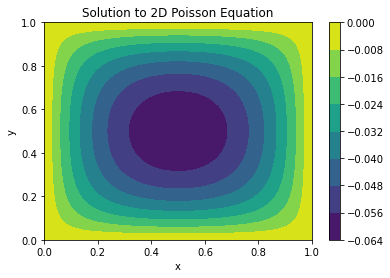

In [2]:
# Define the parameters
Lx = Ly = 1.0  # domain size
Nx = Ny = 50  # number of grid points
dx = Lx / (Nx - 1)  # grid spacing``
dy = Ly / (Ny - 1)

# Create a grid
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y)

# Initialize the solution matrix
ψ = np.zeros((Nx, Ny))

# Set boundary conditions
ψ[:, 0] = 0  # u(x, 0) = 0
ψ[:, -1] = 0  # u(x, Ly) = 0
ψ[0, :] = 0  # u(0, y) = 0
ψ[-1, :] = 0  # u(Lx, y) = 0

# Define the source term
ζ = np.ones((Nx, Ny))  # For simplicity, set f(x, y) = 1

# Perform iterations for solving the Poisson equation
num_iterations = 1000
for iteration in range(num_iterations):
    ψ[1:-1, 1:-1] = (dy**2 * (ψ[2:, 1:-1] + ψ[:-2, 1:-1]) +
                    dx**2 * (ψ[1:-1, 2:] + ψ[1:-1, :-2]) -
                    dx**2 * dy**2 * ζ[1:-1, 1:-1]) / (2 * (dx**2 + dy**2))

# Plot the solution
plt.contourf(X, Y, ψ.T, cmap='viridis')
plt.colorbar()
plt.title('Solution to 2D Poisson Equation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

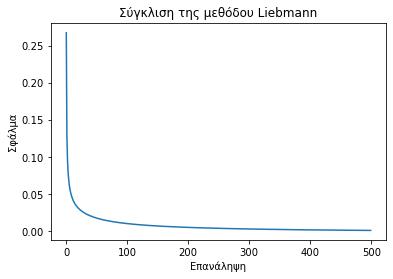

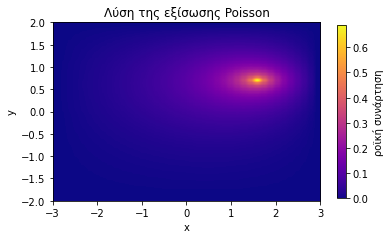

In [3]:
def solve_poisson_liebmann(Lx, Ly, dx, dy, Sx, Sy, tol=1e-4, max_iter=500):
    """
    Λύνει την εξίσωση Poisson με μια πηγή χρησιμοποιώντας τη μέθοδο Liebmann.
    
    Ορίσματα:
        Lx (float): Μήκος του πεδίου στον άξονα x.
        Ly (float): Μήκος του πεδίου στον άξονα y.
        dx (float): Βήμα πλέγματος στον άξονα x.
        dy (float): Βήμα πλέγματος στον άξονα y.
        Sx (float): Συντεταγμένη x της πηγής.
        Sy (float): Συντεταγμένη y της πηγής.
        tol (float, προαιρετικό): Κριτήριο ανοχής σφάλματος για τη σύγκλιση.
        max_iter (int, προαιρετικό): Μέγιστος αριθμός επαναλήψεων.
    
    Επιστρέφει:
        np.ndarray: Πίνακας λύσης.
        list: Λίστα με τα σφάλματα σε κάθε επανάληψη.

    """

    
    x=np.arange(-Lx,Lx,dx)
    y=np.arange(-Ly,Ly,dy)
   
    # μέγεθος του numpy array
    Nx = x.size
    Ny = y.size

    # Αρχικοποίηση πίνακα λύσης και πίνακα σφαλμάτων
    b = np.zeros((Nx, Ny))
        
    # Ορισμός οριακών συνθηκών
    b[0, :] = 0
    b[-1, :] = 0
    b[:, 0] = 0
    b[:, -1] = 0
    
    # Ορισμός σημειακής πηγής
    S = np.zeros((Nx, Ny))

    i1 = np.abs(x - Sx).argmin()
    j1 = np.abs(y - Sy).argmin()
    S[i1, j1] = 100

    errors = []
    iter = 0
    
    # Επανάληψη Liebmann
    while iter < max_iter:
        iter += 1
        b_prev = b.copy()
        for i in range(1, Nx - 1):
            for j in range(1, Ny - 1):
                b[i,j] = 0.25 * (b_prev[i+1,j] + b[i-1,j] + b_prev[i,j+1] + b[i,j-1] + dx**2 * S[i,j])
        
        error = np.linalg.norm(b - b_prev, 2)
        errors.append(error)
        
        # Έλεγχος για σύγκλιση
        if error < tol:
            break

    return b, errors

# Παράμετροι
Lx = 3.0
Ly = 2.0
dx = dy =  0.1
Sx = 1.0
Sy = 1.0

# Λύση της εξίσωσης Poisson
solution, errors = solve_poisson_liebmann(Lx, Ly, dx, dy, Sx, Sy)

# Γράφημα του σφάλματος
plt.plot(errors)
plt.xlabel('Επανάληψη')
plt.ylabel('Σφάλμα')
plt.title('Σύγκλιση της μεθόδου Liebmann')
plt.show()

# Γράφημα της λύσης
plt.figure(figsize=(6, 4))
plt.imshow(solution, extent=[-Lx, Lx, -Ly, Ly], origin='lower', cmap='plasma')
plt.colorbar(label='ροϊκή συνάρτηση', shrink=0.8)
plt.title('Λύση της εξίσωσης Poisson')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

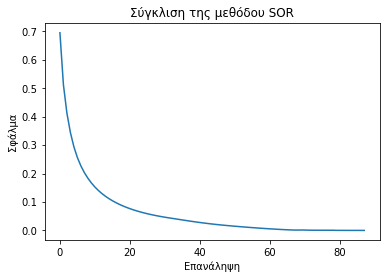

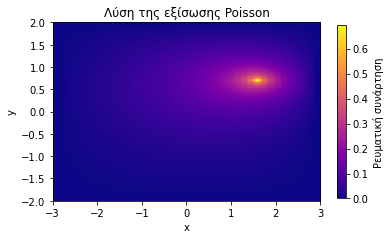

In [5]:
def solve_poisson_sor(Lx, Ly, dx, dy, Sx, Sy, tol=1e-4, max_iter=300):
    """
    Λύνει την εξίσωση Poisson με μια πηγή χρησιμοποιώντας τη μέθοδο Successive Over-Relaxation (SOR).
    
    Ορίσματα:
        Lx (float): Μήκος του πεδίου στον άξονα x.
        Ly (float): Μήκος του πεδίου στον άξονα y.
        dx (float): Βήμα του πλέγματος στον άξονα x.
        dy (float): Βήμα του πλέγματος στον άξονα y.
        Sx (float): Συντεταγμένη x της πηγής.
        Sy (float): Συντεταγμένη y της πηγής.
        tol (float, προαιρετικό): Κριτήριο ανοχής σφάλματος για τη σύγκλιση (προεπιλογή είναι 1e-5).
        max_iter (int, προαιρετικό): Μέγιστος αριθμός επαναλήψεων (προεπιλογή είναι 200).
    
    Επιστρέφει:
        np.ndarray: Πίνακας λύσης.
        list: Λίστα με τα σφάλματα σε κάθε επανάληψη.

    """

    # Ορισμός πλέγματος   
    x=np.arange(-Lx,Lx,dx)
    y=np.arange(-Ly,Ly,dy)
   
    # size of numpy array
    Nx = x.size
    Ny = y.size
    
    
    # Αρχικοποίηση πίνακα λύσης
    ψ = np.zeros((Nx, Ny))
    r = np.zeros((Nx, Ny))
    
    # Ορισμός οριακών συνθηκών
    ψ[0, :] = 0
    ψ[-1, :] = 0
    ψ[:, 0] = 0
    ψ[:, -1] = 0
    
    # Ορισμός σημειακής πηγής στο σημείο (Sx, Sy)
    ζ = np.zeros((Nx, Ny))

    i1 = np.abs(x - Sx).argmin()
    j1 = np.abs(y - Sy).argmin()
    ζ[i1, j1] = -100

    # Βέλτιστη παράμετρος χαλάρωσης για τη μέθοδο SOR
    b = dx / dy
    ksi = ((np.cos(np.pi / Nx) + b**2 * np.cos(np.pi / Ny)) / (1.0 + b**2))**2
    omegaopt = 2.0 * (1.0 - np.sqrt(1 - ksi)) / ksi

    errors = []
    iter = 0

    # Επανάληψη SOR
    while iter < max_iter:
        iter += 1
        ψ_prev = ψ.copy()
        for i in range(1, Nx - 1):
            for j in range(1, Ny - 1):
                r[i,j] = (1.0 /(2.0 * (1.0 + b**2)))* (ψ_prev[i+1,j] + ψ[i-1,j]
                                                        + b**2 * ψ_prev[i,j+1] + b**2 * ψ[i,j-1] 
                                                        - (dx**2)*ζ[i,j] - 2.0 * (1.0 + b**2) * ψ_prev[i,j]) 
                ψ[i,j] = ψ_prev[i,j] + omegaopt * r[i,j] 
            
        
        error = np.linalg.norm(ψ - ψ_prev, 2)
        errors.append(error)
                

        # Έλεγχος για σύγκλιση
        if error < tol:
            break
    
    return ψ, errors

# Παράμετροι
Lx = 3.0
Ly = 2.0
dx = dy = 0.1
Sx = 1.0
Sy = 1.0

# Λύση της εξίσωσης Poisson
solution, errors = solve_poisson_sor(Lx, Ly, dx, dy, Sx, Sy)

# Γράφημα του σφάλματος
plt.plot(errors)
plt.xlabel('Επανάληψη')
plt.ylabel('Σφάλμα')
plt.title('Σύγκλιση της μεθόδου SOR')
plt.savefig('poisson_SOR_convergence.png', dpi=300)
plt.show()


# Γράφημα της λύσης
plt.figure(figsize=(6, 4))
plt.imshow(solution, extent=[-Lx, Lx, -Ly, Ly], origin='lower', cmap='plasma')
plt.colorbar(label='Ρευματική συνάρτηση', shrink=0.8)
plt.title('Λύση της εξίσωσης Poisson')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('poisson_SOR_solution.png', dpi=300)
plt.show()


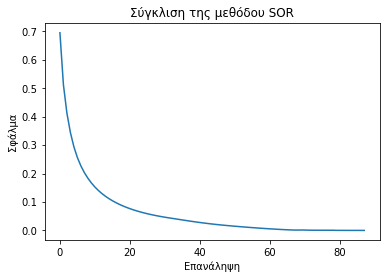

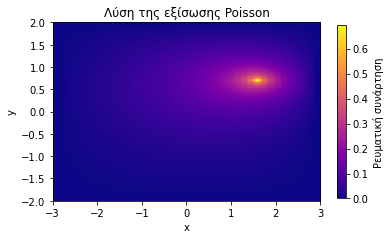

In [3]:
def solve_poisson_sor(Lx, Ly, dx, dy, Sx, Sy, tol=1e-4, max_iter=300):
    """
    Λύνει την εξίσωση Poisson με μια πηγή χρησιμοποιώντας τη μέθοδο διαδοχικής υπερ-χαλάρωσης.
    
    Ορίσματα:
        Lx (float): Μήκος του πεδίου στον άξονα x.
        Ly (float): Μήκος του πεδίου στον άξονα y.
        dx (float): Βήμα του πλέγματος στον άξονα x.
        dy (float): Βήμα του πλέγματος στον άξονα y.
        Sx (float): Συντεταγμένη x της πηγής.
        Sy (float): Συντεταγμένη y της πηγής.
        tol (float, προαιρετικό): Κριτήριο ανοχής σφάλματος για τη σύγκλιση.
        max_iter (int, προαιρετικό): Μέγιστος αριθμός επαναλήψεων.
    
    Επιστρέφει:
        np.ndarray: Πίνακας λύσης.
        list: Λίστα με τα σφάλματα σε κάθε επανάληψη.

    """

    # Ορισμός πλέγματος   
    x=np.arange(-Lx,Lx,dx)
    y=np.arange(-Ly,Ly,dy)
   
    # μέγεθος του numpy array
    Nx = x.size
    Ny = y.size
    
    
    # Αρχικοποίηση πίνακα λύσης
    b = np.zeros((Nx, Ny))
    r = np.zeros((Nx, Ny))
    
    # Ορισμός οριακών συνθηκών
    b[0, :] = 0
    b[-1, :] = 0
    b[:, 0] = 0
    b[:, -1] = 0
    
    # Ορισμός σημειακής πηγής στο σημείο (Sx, Sy)
    S = np.zeros((Nx, Ny))

    i1 = np.abs(x - Sx).argmin()
    j1 = np.abs(y - Sy).argmin()
    S[i1, j1] = -100

    # Βέλτιστη παράμετρος χαλάρωσης για τη μέθοδο SOR
    p = dx / dy
    ksi = ((np.cos(np.pi / Nx) + p**2 * np.cos(np.pi / Ny)) / (1.0 + p**2))**2
    omegaopt = 2.0 * (1.0 - np.sqrt(1 - ksi)) / ksi

    errors = []
    iter = 0

    # Επανάληψη SOR
    while iter < max_iter:
        iter += 1
        b_prev = b.copy()
        for i in range(1, Nx - 1):
            for j in range(1, Ny - 1):
                r[i,j] = (1.0 /(2.0 * (1.0 + p**2)))* (b_prev[i+1,j] + b[i-1,j] + p**2 * b_prev[i,j+1] + p**2 * b[i,j-1] - (dx**2)*S[i,j] - 2.0 * (1.0 + p**2) * b_prev[i,j]) 
                b[i,j] = b_prev[i,j] + omegaopt * r[i,j] 
            
        
        error = np.linalg.norm(b - b_prev, 2)
        errors.append(error)
                

        # Έλεγχος για σύγκλιση
        if error < tol:
            break
    
    return b, errors

# Παράμετροι
Lx = 3.0
Ly = 2.0
dx = dy = 0.1
Sx = 1.0
Sy = 1.0

# Λύση της εξίσωσης Poisson
solution, errors = solve_poisson_sor(Lx, Ly, dx, dy, Sx, Sy)

# Γράφημα του σφάλματος
plt.plot(errors)
plt.xlabel('Επανάληψη')
plt.ylabel('Σφάλμα')
plt.title('Σύγκλιση της μεθόδου SOR')
plt.savefig('poisson_SOR_convergence.png', dpi=300)
plt.show()


# Γράφημα της λύσης
plt.figure(figsize=(6, 4))
plt.imshow(solution, extent=[-Lx, Lx, -Ly, Ly], origin='lower', cmap='plasma')
plt.colorbar(label='Ρευματική συνάρτηση', shrink=0.8)
plt.title('Λύση της εξίσωσης Poisson')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('poisson_SOR_solution.png', dpi=300)
plt.show()